In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# generate data non-normal data (exponential distribution)
np.random.seed(0)
df = pd.DataFrame(np.random.exponential(size = 1000, scale =2), columns=['values'])
df.shape

(1000, 1)

<Axes: ylabel='Count'>

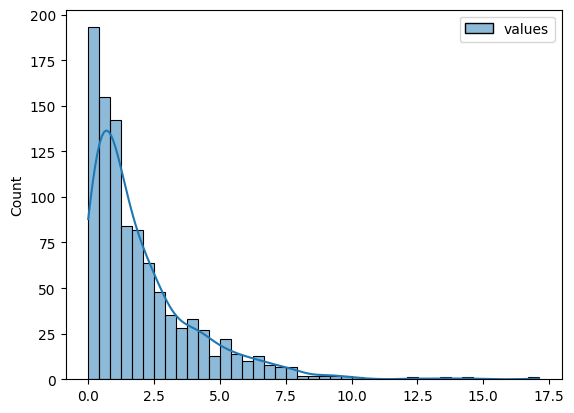

In [11]:
# make the histplot
sns.histplot(data = df, kde=True)

In [69]:
# import power transformer
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

In [70]:
# first we will divide transformer into 2 parts
pt_boxcox = PowerTransformer(method = 'box-cox', standardize=True) # data must  be positive for boxcox
pt_yeo_johnson = PowerTransformer(method = 'yeo-johnson', standardize=True) 
qt_trans = QuantileTransformer(output_distribution='normal')

In [65]:
# first we will divide transformer into 2 parts Not standarized
pt_boxcox = PowerTransformer(method = 'box-cox', standardize=False) # data must  be positive for boxcox
pt_yeo_johnson = PowerTransformer(method = 'yeo-johnson', standardize=False) 

In [71]:
# add new empty column and add values in it 
df['Box-cox'] = pt_boxcox.fit_transform( df[['values']]+1)
df['yeo_johsons'] = pt_yeo_johnson.fit_transform( df[['values']])
df['Quantile_transformer'] = qt_trans.fit_transform(df[['values']])
df.head()

,values,Box-cox,yeo_johsons,Quantile_transformer
0,1.591749,0.179335,0.179335,0.162552
1,2.511862,0.677331,0.677331,0.587964
2,1.846446,0.339698,0.339698,0.286135
3,1.574402,0.167607,0.167607,0.157469
4,1.102097,-0.202107,-0.202107,-0.154930


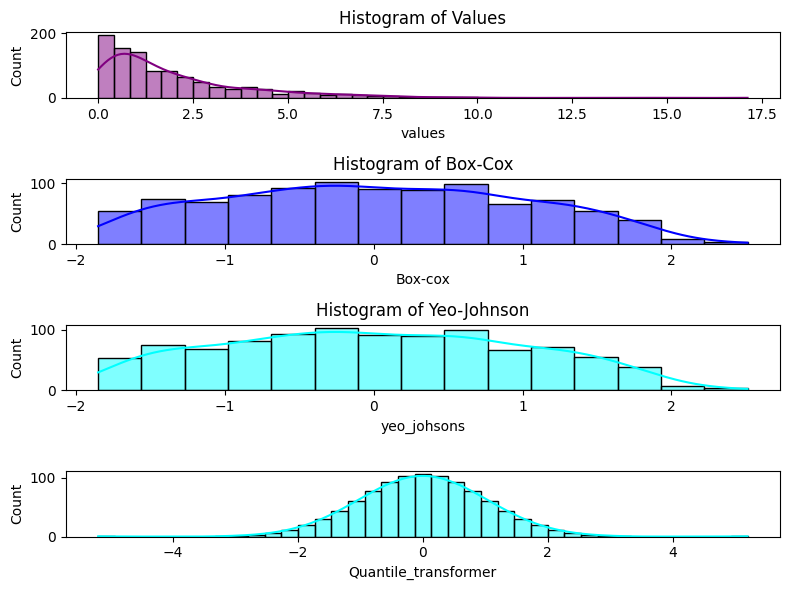

In [76]:
# create histogram for all these three
figure, axs = plt.subplots(4,1, figsize=(8,6))
sns.histplot(data = df['values'],kde=True,ax=axs[0], color='purple')
sns.histplot(data = df['Box-cox'],kde=True,ax=axs[1], color='blue')
sns.histplot(data = df['yeo_johsons'],kde=True,ax=axs[2], color='cyan')
sns.histplot(data = df['Quantile_transformer'],kde=True,ax=axs[3], color='cyan')
# Set titles for each subplot
axs[0].set_title('Histogram of Values')
axs[1].set_title('Histogram of Box-Cox')
axs[2].set_title('Histogram of Yeo-Johnson')
plt.tight_layout()
plt.show()

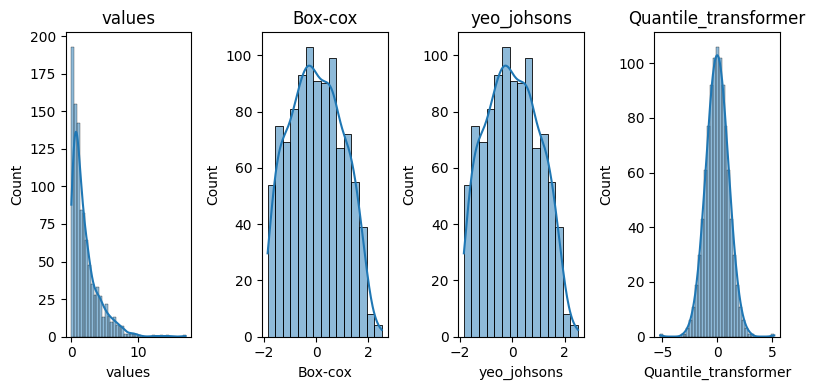

In [77]:
# Create a figure with multiple subplots
fig, axs = plt.subplots(1, len(df.columns), figsize=(8,4))
# Iterate over the columns and plot a histogram for each one
for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axs[i])
    axs[i].set_title(col)
# Use tight layout to ensure the subplots fit well in the figure
plt.tight_layout()
# Show the plot
plt.show()